In [116]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [142]:
df = pd.read_csv('../data/vocab.csv')
minVocabFreq = 0.025
maxVocabFreq = 0.1
df = df[df['document_frequency'] > minVocabFreq][df['document_frequency'] < maxVocabFreq]
df = df.set_index('word')

for idx,r in df.iterrows():
    df.at[idx, 'code'] = 0.5

df.code = df.code.apply(float)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [143]:
train = pd.read_csv('../data/imdb_dataset.csv')
positivity = {}
for idx, r in train.iterrows():
    label = (r.label == 'pos')
    for w in r.review.split():
        if w in df.index:
            if w not in positivity:
                positivity[w] = 0.0
            positivity[w] += 1.0 if label else -1.0
maxPos = 0
minPos = 0
for w, p in positivity.items():
    maxPos = max(maxPos, p)
    minPos = min(minPos, p)

for w, p in positivity.items():
    if p > 0:
        positivity[w] = (p/(2.0*maxPos)) + 0.5
    else:
        positivity[w] = 0.5 - (p/(minPos*2.0))

In [144]:
# positivity['br']
for idx,r in df.iterrows():
    if idx in positivity:
        df.at[idx, 'code'] = positivity[idx]

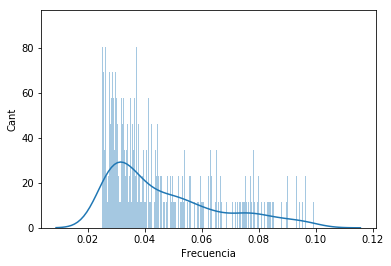

In [145]:
sns.distplot(df.document_frequency, 
             bins = 500)
plt.xlabel('Frecuencia')
plt.ylabel('Cant')
plt.savefig('img/freq-histo-{}-{}.jpg'.format(minVocabFreq, maxVocabFreq))
plt.show()

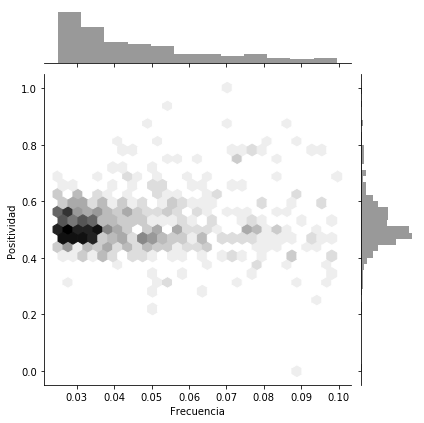

In [147]:
x = df.document_frequency
y = df.code
sns.jointplot(x, y, kind="hex", color="black").set_axis_labels("Frecuencia", "Positividad")
# plt.ylabel('Positivity')
plt.savefig('img/freq-pos-{}-{}.jpg'.format(minVocabFreq, maxVocabFreq))
plt.show()